In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import cwt, morlet
import pywt
import os
import time


In [2]:


# Specify the path to the downloaded file
file_path = '/content/0_084.mp3'  # Replace with the actual file path

try:
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    # Load the audio file with librosa
    amp, sr = librosa.load(file_path, sr=22050)
    print(f"Audio Shape: {amp.shape}, Sample Rate: {sr}")

except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")
except Exception as e:
    print(f"Error loading the audio file: {e}")
except librosa.util.exceptions.ParameterError as param_error:
    print(f"Parameter error: {param_error}")


Audio Shape: (110250,), Sample Rate: 22050


In [3]:
    #Spectral features
    spectral_centroid = librosa.feature.spectral_centroid(y=amp, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=amp, sr=sr)
    stacked_array = np.hstack(spectral_centroid)

    spectral_centroid1 = librosa.feature.spectral_centroid(y=amp, sr=sr)
    spectral_bandwidth1 = librosa.feature.spectral_bandwidth(y=amp, sr=sr)
    stacked_array1 = np.hstack(spectral_centroid1)

    # Save the stacked array as a CSV file
    try:
        np.savetxt("output.csv", stacked_array.T, delimiter=",", fmt="%f")
        print("File saved successfully!")
    except Exception as e:
        print(f"Error: {e}")


    print("Spectral Centroid:", spectral_centroid)
    print("Spectral Bandwidth:", spectral_bandwidth)


File saved successfully!
Spectral Centroid: [[ 827.98688328  697.35620806  578.66805821  595.79177747  609.10140514
   566.20571363  445.50688516  397.63095688  356.26000654  336.56632472
   417.69220903  508.20610898  505.44734012  487.2940289   435.11982125
   401.14733849  421.30210444  483.87892456  505.97868363  517.57230848
   521.32666556  628.77692653 1022.36457006 1020.20050858  803.34842789
   593.87586993  444.01575343  440.31364332  511.50645915  579.24289428
   935.31881067 1162.43625013 1022.27791025  739.97299332  581.58224417
   514.90810346  515.87534255  520.48297879  515.74201386  496.19534871
   521.02514412  444.8710405   349.82297565  243.92507054  222.65083275
   240.93789726  326.22305354  508.63672062  665.35834543  726.23292613
   427.94404027  317.832999    315.37992986  431.98241181  528.06483161
   564.01491258  530.39432828  499.37171564  770.97142291  853.88300464
   739.66473003  615.31367919  599.3624522   595.19508492  613.09713659
   624.59692377  755

Text(138.59722222222223, 0.5, 'Amplitude')

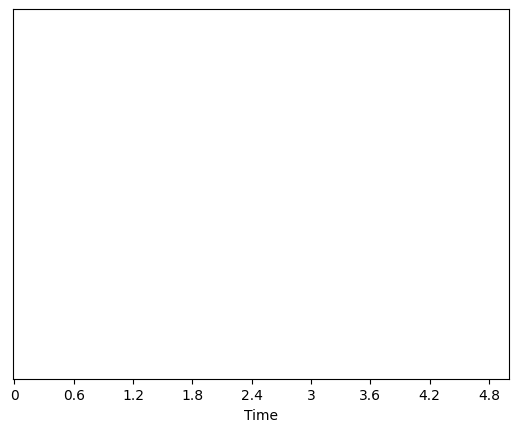

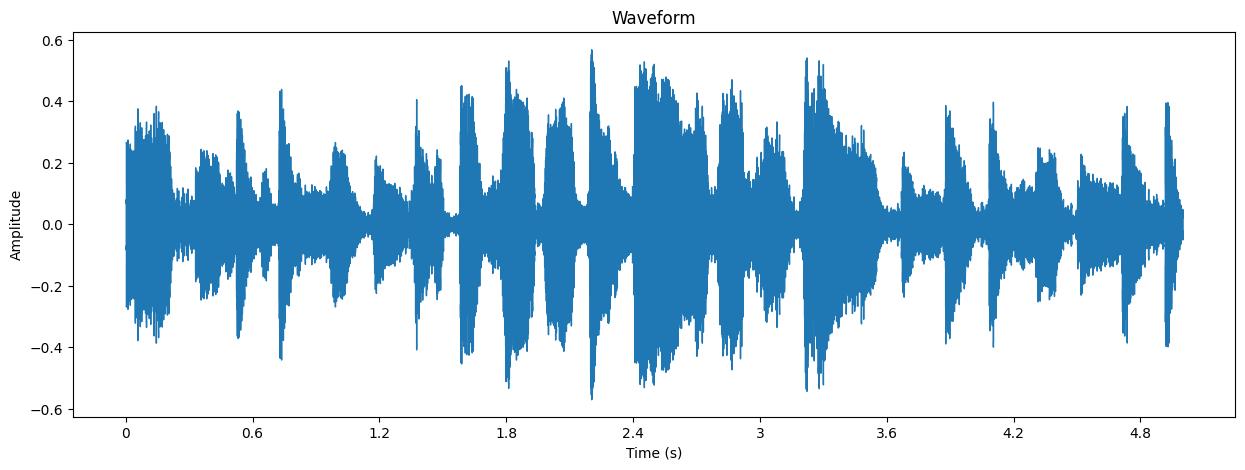

In [4]:
    spectra= librosa.feature.zero_crossing_rate(y=amp)
    librosa.display.specshow(spectra,x_axis="time")
    # Waveform visualization
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(amp, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

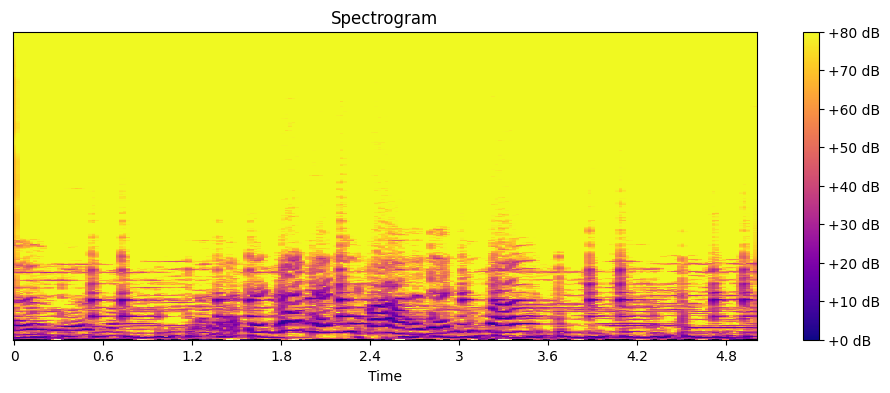

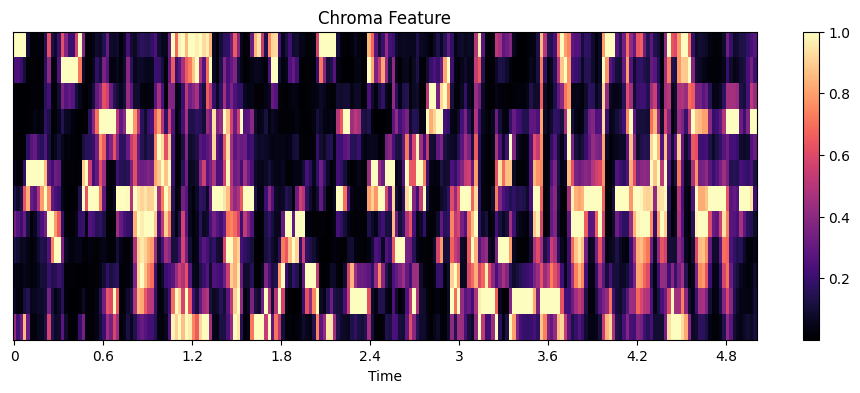

Spectrogram Shape (Frequency bins, Time frames): (1025, 216)


In [5]:
    # # Short-Time Fourier Transform and Spectrogram
    D = librosa.stft(amp)
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max )

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(np.abs(S_db), sr=sr, x_axis='time', y_axis='hz', cmap='plasma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')

    chroma = librosa.feature.chroma_stft(y=amp, sr=sr)
    print(librosa.display.specshow(chroma, x_axis="time"))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chroma, x_axis="time", cmap="magma")
    plt.colorbar()
    plt.title("Chroma Feature")
    plt.show()
    print("Spectrogram Shape (Frequency bins, Time frames):", D.shape)



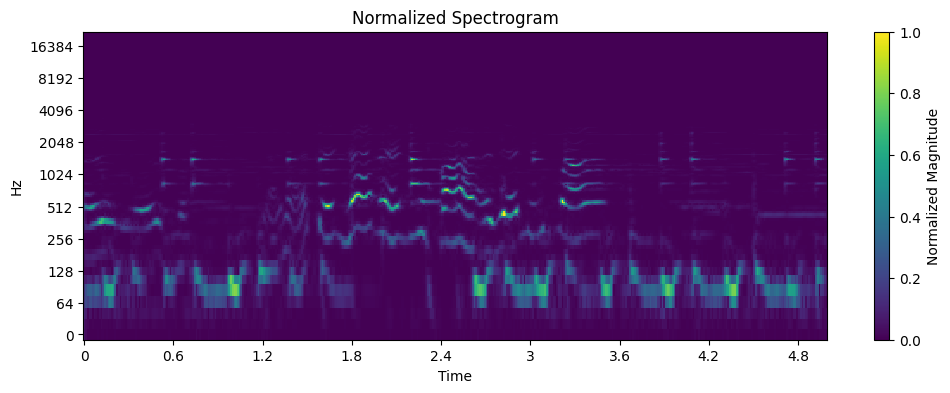

Spectrogram shape: (1025, 431)


In [6]:

#Normalized spectogram values
y, sr = librosa.load(file_path, sr=None, mono=True)

# Compute Spectrogram
D = np.abs(librosa.stft(y))

# Normalize Spectrogram (0 to 1)
D_norm = (D - np.min(D)) / (np.max(D) - np.min(D))

# Display Normalized Spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(D_norm, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(label='Normalized Magnitude')
plt.title('Normalized Spectrogram')
plt.show()

print("Spectrogram shape:", D_norm.shape)

MFCCs shape: (13, 216)


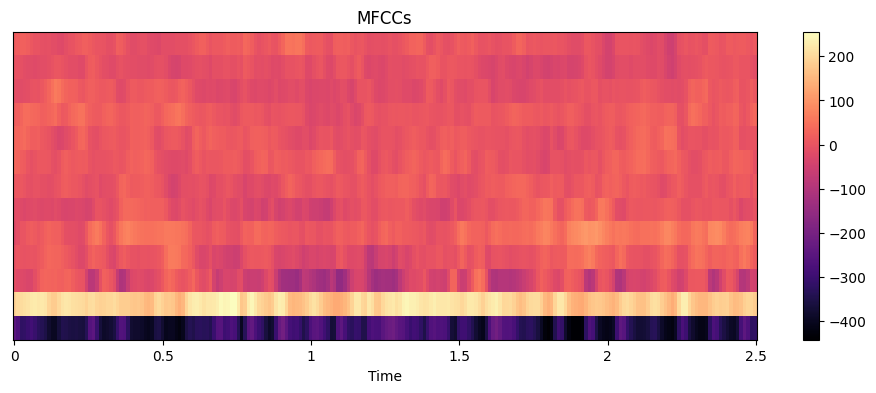

In [7]:
    # MFCCs
    mfccs = librosa.feature.mfcc(y=amp, sr=sr, n_mfcc=13)
    print(f"MFCCs shape: {mfccs.shape}")

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='magma')
    plt.colorbar()
    plt.title('MFCCs')
    plt.show()

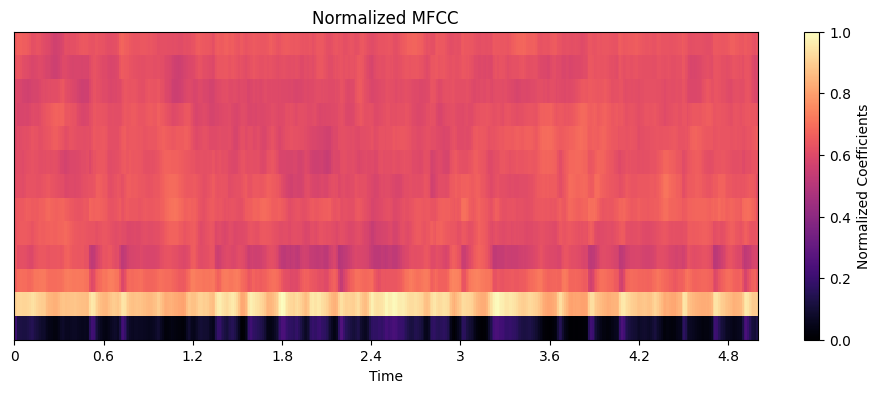

MFCC shape: (13, 431)


In [8]:
#Normalized spectogram values\
y, sr = librosa.load(file_path, sr=None, mono=True)

# Compute MFCC (13 coefficients by default)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Normalize MFCC (0 to 1)
mfccs_norm = (mfccs - np.min(mfccs)) / (np.max(mfccs) - np.min(mfccs))

# Display Normalized MFCC
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs_norm, sr=sr, x_axis='time', cmap='magma')
plt.colorbar(label='Normalized Coefficients')
plt.title('Normalized MFCC')
plt.show()

print("MFCC shape:", mfccs_norm.shape)

In [9]:
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames, sr=sr)
spectral_centroid = librosa.feature.spectral_centroid(y=amp, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=amp, sr=sr)
centroid = np.hstack(spectral_centroid)
bandwidth = np.hstack(spectral_bandwidth)
spectra= librosa.feature.zero_crossing_rate(y=amp)
print(spectra)
# Save the stacked array as a CSV file
try:
        np.savetxt("spectral_centroid_midi.csv", centroid.T, delimiter=",", fmt="%f")
        np.savetxt("spectral_bandwidth_midi.csv", bandwidth.T, delimiter=",", fmt="%f")

        print("File saved successfully!")
except Exception as e:
        print(f"Error: {e}")

[[0.01953125 0.03027344 0.0390625  0.03759766 0.03662109 0.03369141
  0.02978516 0.02734375 0.02197266 0.02392578 0.02734375 0.03125
  0.03613281 0.03417969 0.03564453 0.03662109 0.0390625  0.04248047
  0.04345703 0.04101562 0.03857422 0.04980469 0.05664062 0.05810547
  0.05322266 0.03515625 0.02539062 0.02587891 0.03466797 0.04296875
  0.06689453 0.07421875 0.0703125  0.06445312 0.03759766 0.02783203
  0.02197266 0.01708984 0.01611328 0.01220703 0.01171875 0.01220703
  0.01025391 0.00830078 0.00927734 0.00976562 0.015625   0.03564453
  0.04541016 0.04638672 0.04150391 0.0234375  0.015625   0.02148438
  0.02441406 0.02929688 0.03125    0.03417969 0.05224609 0.05761719
  0.06298828 0.05761719 0.04638672 0.04394531 0.05175781 0.06103516
  0.06884766 0.07910156 0.07666016 0.07275391 0.06445312 0.05761719
  0.05517578 0.05224609 0.04931641 0.04052734 0.03955078 0.04394531
  0.04980469 0.06298828 0.07177734 0.07324219 0.07470703 0.06982422
  0.06542969 0.06689453 0.06298828 0.06201172 0.054

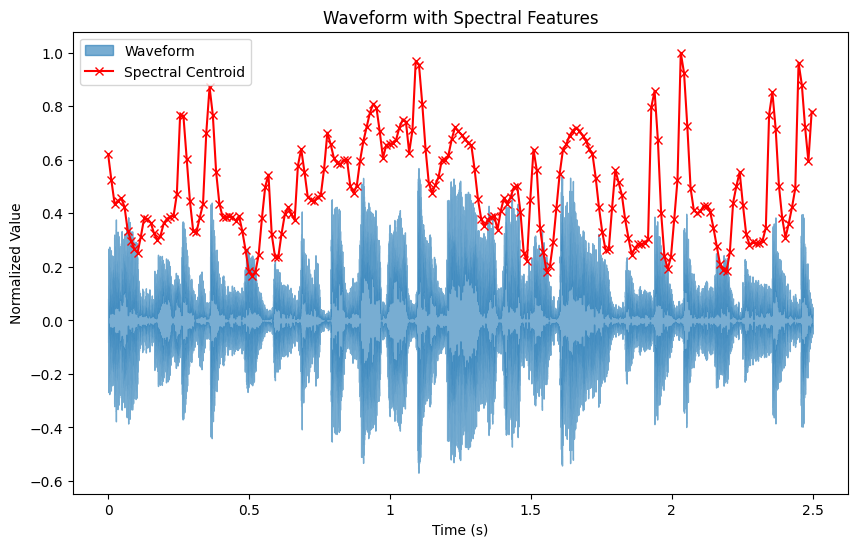

In [10]:
frames = range(spectral_centroid.shape[1])  # Get the number of frames
t = librosa.frames_to_time(frames, sr=sr)  # Convert frame indices to time
plt.figure(figsize=(10, 6))
librosa.display.waveshow(amp, sr=sr, alpha=0.6, label="Waveform")
plt.plot(t, spectral_centroid.T / np.max(spectral_centroid), marker='x', color='r', label='Spectral Centroid')
#plt.plot(t, spectral_bandwidth.T / np.max(spectral_bandwidth), marker='o', color='b', label='Spectral Bandwidth')
plt.xlabel("Time (s)")
plt.ylabel("Normalized Value")
plt.legend()
plt.title("Waveform with Spectral Features")
plt.show()

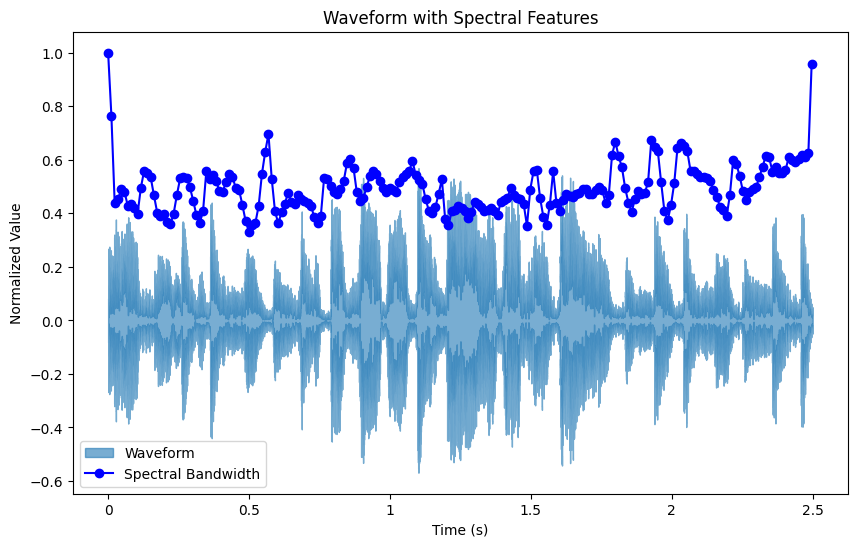

In [11]:
plt.figure(figsize=(10, 6))
librosa.display.waveshow(amp, sr=sr, alpha=0.6, label="Waveform")
plt.plot(t, spectral_bandwidth.T / np.max(spectral_bandwidth), marker='o', color='b', label='Spectral Bandwidth')
plt.xlabel("Time (s)")
plt.ylabel("Normalized Value")
plt.legend()
plt.title("Waveform with Spectral Features")
plt.show()

<ipython-input-12-815265655027>:13: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_result = cwt(spectrogram, morlet, widths)


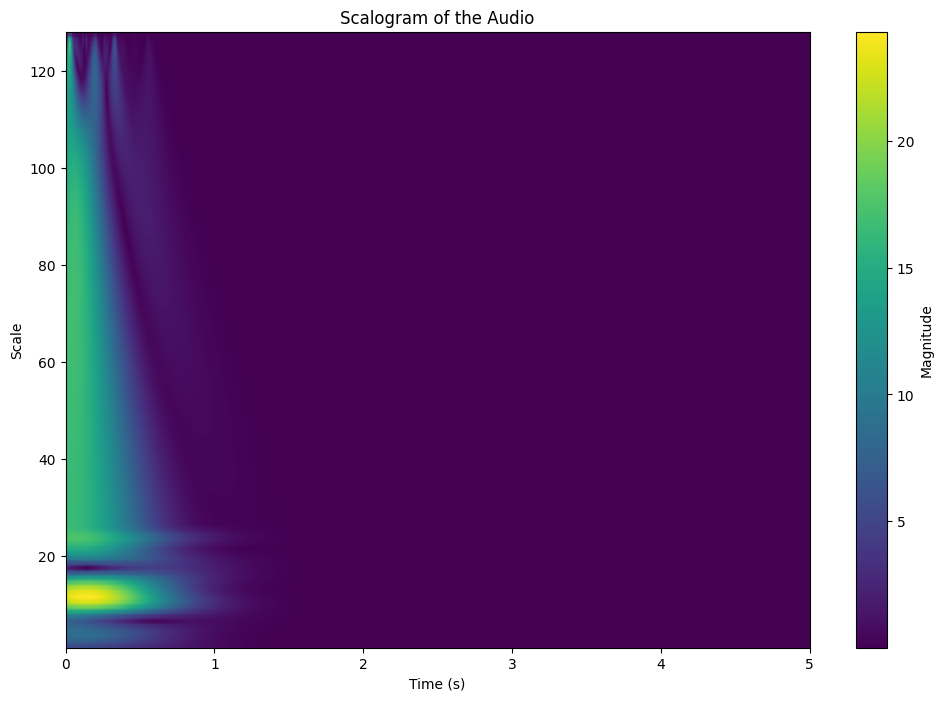

In [12]:
y, sr = librosa.load(file_path, sr=None)

# Generate a spectrogram
D = np.abs(librosa.stft(y))

# Use the mean frequency content across time
spectrogram = np.mean(D, axis=1)

# Define wavelet scales (adjust for better resolution)
widths = np.arange(1, 128)

# Apply Continuous Wavelet Transform (CWT) using Morlet wavelet
cwt_result = cwt(spectrogram, morlet, widths)

# Visualize the Scalogram
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_result), extent=[0, len(y) / sr, 1, 128], cmap='viridis', aspect='auto')
plt.colorbar(label="Magnitude")
plt.title("Scalogram of the Audio")
plt.xlabel("Time (s)")
plt.ylabel("Scale")
plt.show()


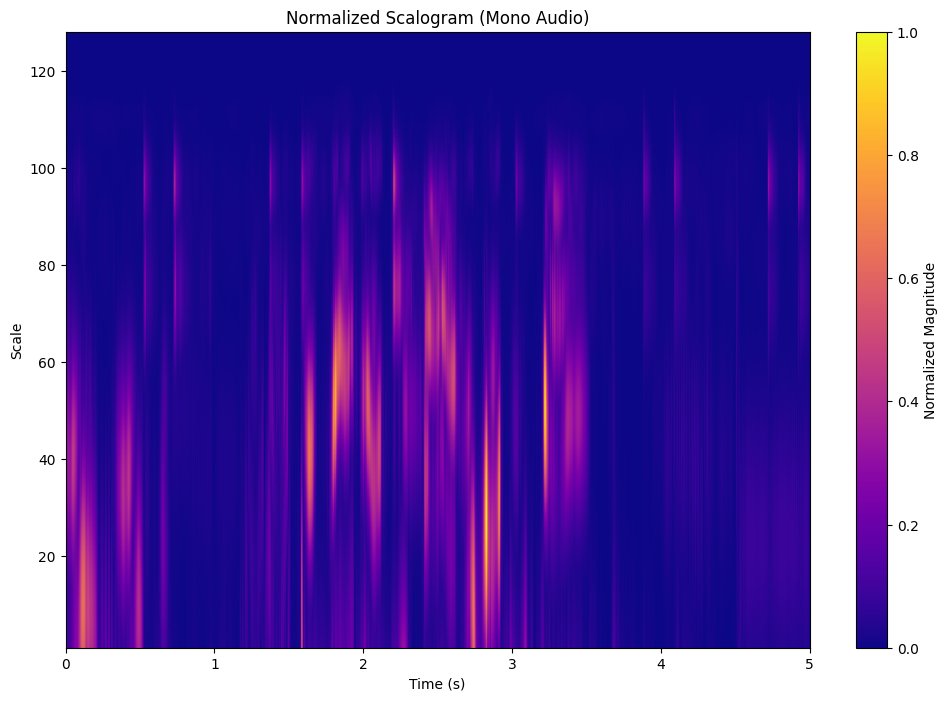

Scalogram shape (Scales, Time frames): (127, 220500)


In [13]:
y, sr = librosa.load(file_path, sr=None, mono=True)

# Define wavelet scales and the wavelet type (using 'cmor' for continuous Morlet wavelet)
widths = np.arange(1, 128)  # Number of scales
wavelet = 'cmor1.5-1.0'     # Complex Morlet wavelet

# Compute the scalogram using PyWavelets
coeffs, _ = pywt.cwt(y, widths, wavelet, sampling_period=1/sr)

# Get the magnitude of the coefficients
scalogram = np.abs(coeffs)

# Normalize the scalogram (0 to 1)
scalogram_norm = (scalogram - np.min(scalogram)) / (np.max(scalogram) - np.min(scalogram))

# Display the normalized scalogram
plt.figure(figsize=(12, 8))
plt.imshow(scalogram_norm, extent=[0, len(y) / sr, 1, 128], cmap='plasma', aspect='auto')
plt.colorbar(label="Normalized Magnitude")
plt.title("Normalized Scalogram (Mono Audio)")
plt.xlabel("Time (s)")
plt.ylabel("Scale")
plt.show()

# Print the shape of the scalogram
print("Scalogram shape (Scales, Time frames):", scalogram_norm.shape)